In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()

In [3]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

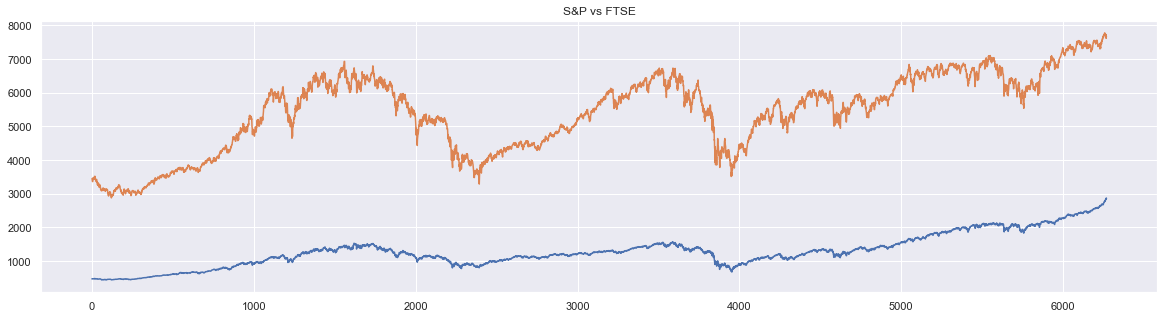

In [7]:
df_comp.spx.plot(figsize = (20,5), title = 'S&P500 Price')
df_comp.ftse.plot(figsize = (20,5), title = 'FTSE100 Price')
plt.title('S&P vs FTSE')
plt.show()

### The Quantile - Quantile plot (QQ plot)
Use to showcase how the data fits the normal distribution

In [8]:
import scipy.stats
import pylab

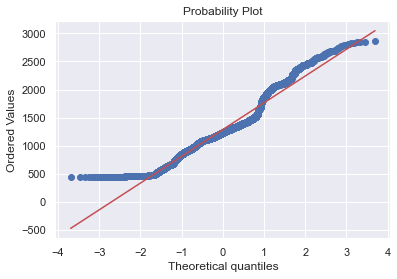

In [9]:
scipy.stats.probplot(df_comp['spx'], plot = pylab)
pylab.show()

# Convert DataFrame into Time Series 

## Date column as date type and index column

In [10]:
df_comp.columns.values

array(['date', 'spx', 'dax', 'ftse', 'nikkei'], dtype=object)

In [11]:
df_comp['date'].iloc[0]

'07/01/1994'

In [12]:
df_comp['date'] = pd.to_datetime(df_comp['date'], format = '%d/%m/%Y')

In [13]:
df_comp['date'].describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [14]:
df_comp.set_index('date', inplace = True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Add desired frequency

In [16]:
df_comp = df_comp.asfreq('b')

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing values

In [18]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp[pd.isnull(df_comp['spx'])]

,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


Fill missing values with front, back or mean (best) values

In [28]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill')
df_comp.dax = df_comp.dax.fillna(method = 'bfill')
df_comp.ftse = df_comp.ftse.fillna(value = df_comp.ftse.mean())
df_comp.nikkei = df_comp.ftse.fillna(value = df_comp.nikkei.mean())

In [30]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Delete columns

In [31]:
df_comp['market_values']= df_comp.spx

In [33]:
del df_comp['dax'] , df_comp['spx'], df_comp['ftse'], df_comp['nikkei']

In [34]:
df_comp.describe()

,market_values
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting data

In [37]:
df_comp.shape

(6277, 1)

In [38]:
size = int(len(df_comp)*0.8)

In [39]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [41]:
df.tail()

,market_values
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [42]:
df_test.head()

,market_values
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


# white noise

In [43]:
wn = np.random.normal(loc = df.market_values.mean(), scale = df.market_values.std(), size = len(df))

In [45]:
df['wn'] = wn

<ipython-input-45-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [46]:
df.describe()

,market_values,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.898524
std,292.559287,293.727955
min,438.920000,-0.465407
25%,914.620000,882.970220
50%,1144.650000,1088.775975
75%,1316.280729,1284.843612
max,1570.252238,2127.957218


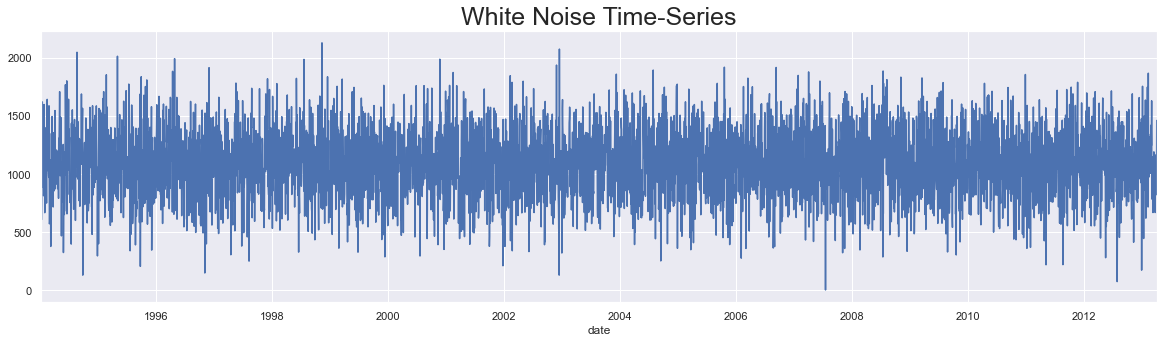

In [54]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time-Series", size =25)
plt.show()

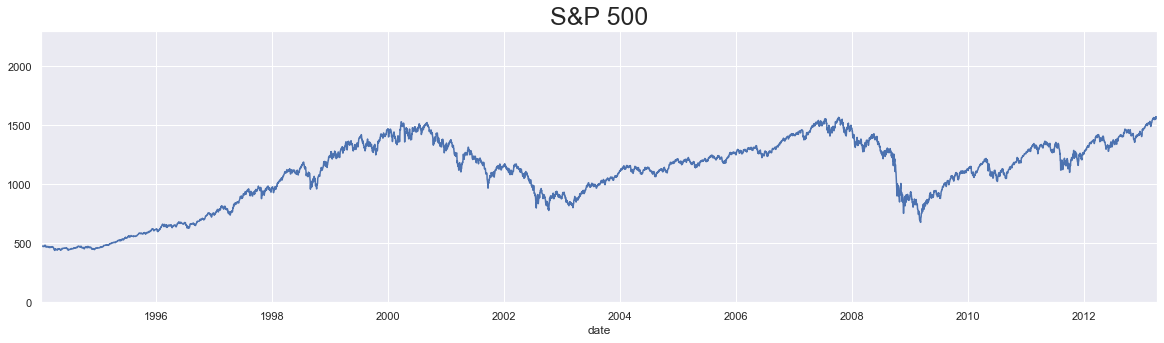

In [57]:
df.market_values.plot(figsize=(20,5))
plt.title("S&P 500", size = 25)
plt.ylim(0,2300)
plt.show()

# Random walk

In [76]:
rw = pd.read_csv('RandWalk.csv')
rw['date'] = pd.to_datetime(rw['date'], format = '%d/%m/%Y', dayfirst = True)
rw.set_index('date', inplace = True)
rw=rw.asfreq('b')

In [77]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [80]:
df['rw'] = rw.price
df.head()

<ipython-input-80-e3d6c4b57795>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


,market_values,wn,rw
date,,,
1994-01-07,469.90,1460.859253,1122.139662
1994-01-10,475.27,603.624738,1080.347860
1994-01-11,474.13,807.433481,1082.095245
1994-01-12,474.17,1053.407782,1083.639265
1994-01-13,472.47,1586.896886,1067.146255


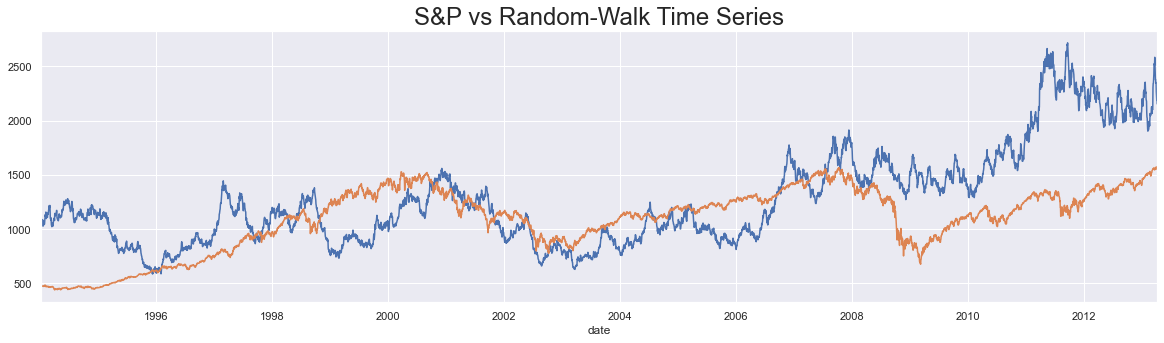

In [82]:
df.rw.plot(figsize=(20,5))
df.market_values.plot()
plt.title("S&P vs Random-Walk Time Series", size = 24)
plt.show()